In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
# Step 1: Data Preprocessing
data = pd.read_csv("country_data.csv")

# Handle missing values (if any)
data.fillna(0, inplace=True)

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Handle missing values (if any)
data.fillna(0, inplace=True)

# Step 2: Feature Selection
# Include relevant features. You can customize this list.
selected_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


# Select the relevant columns
X = data[selected_features]

In [6]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
# Step 3: Clustering Algorithm Selection
# Choose the number of clusters (K)
K = 4  # You can experiment with different values of K

# Step 4: Clustering
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [9]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualizing Clusters using PCA
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


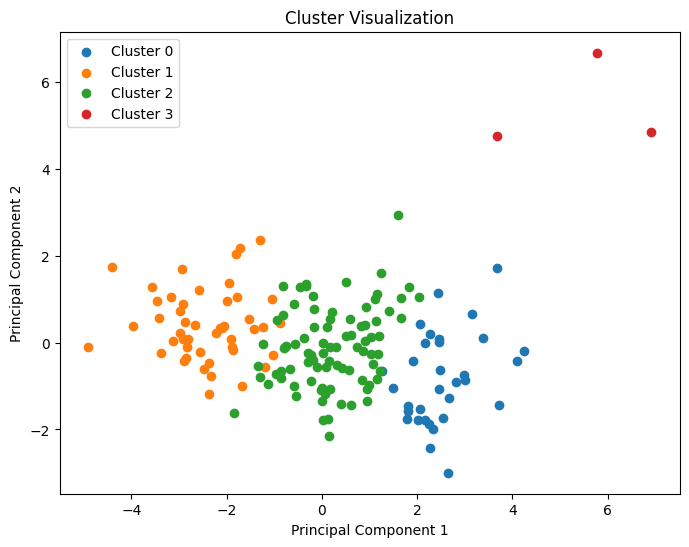

In [10]:
# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(K):
    plt.scatter(X_pca[data['Cluster'] == cluster, 0], X_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Cluster Visualization')
plt.show()


In [11]:
# List to store cluster assignments and inertias
cluster_assignments = []
inertias = []

# Define a range of K values to experiment with
k_values = range(2, 11)

# Perform clustering for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_assignments.append(kmeans.labels_)
    inertias.append(kmeans.inertia_)


/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjala/PycharmProjects/7CS030AI/venv/lib/python3.11/site-packages/sklearn/clus

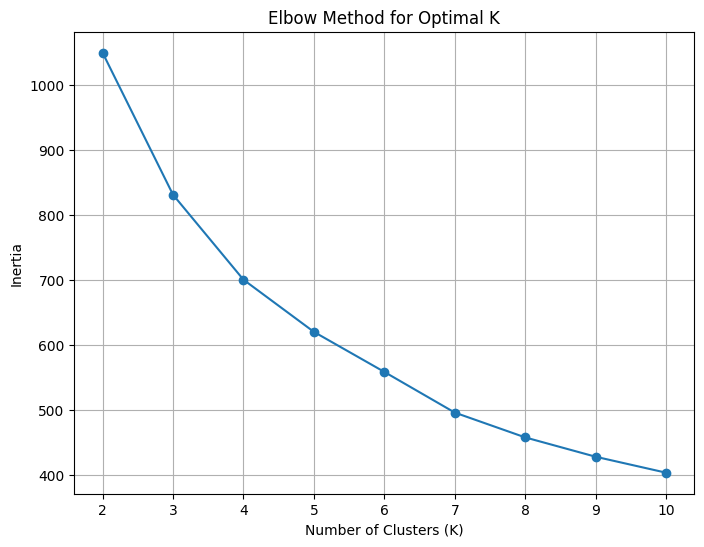

In [12]:
# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [13]:
(inertias, k_values)

([1050.2145582853307,
  831.4244352086876,
  700.5205369722204,
  620.1633712888422,
  558.4696598590401,
  495.80794552153463,
  457.58614789124226,
  427.8036719813467,
  403.22961251364364],
 range(2, 11))

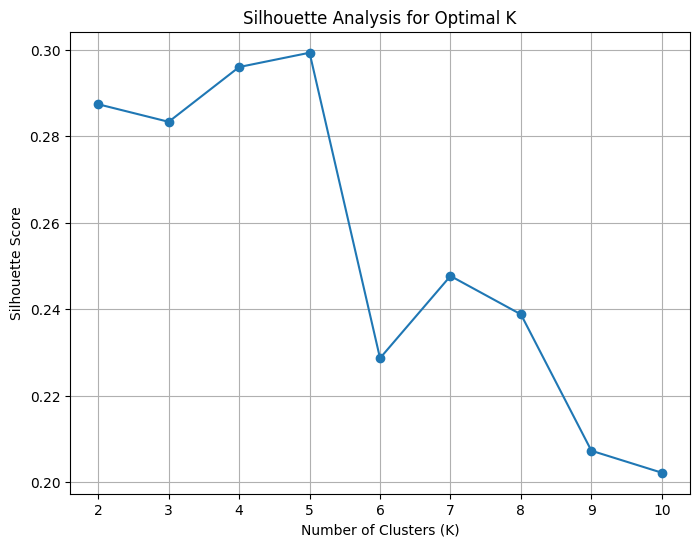

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i, k in enumerate(k_values):
    silhouette_scores.append(silhouette_score(X_scaled, cluster_assignments[i]))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [15]:
(silhouette_scores, k_values)# Create an instance of LogisticRegression
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the performance of the model using accuracy score, confusion matrix, and classification report
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cr_log_reg = classification_report(y_test, y_pred_log_reg)

# Print the results
print('Accuracy score of Logistic Regression:', acc_log_reg)
print('Confusion matrix of Logistic Regression:\n', cm_log_reg)
print('Classification report of Logistic Regression:\n', cr_log_reg)


NameError: name 'LogisticRegression' is not defined